In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import d2d
import importlib
importlib.reload(d2d)

import matplotlib.pyplot as plt
from datetime import datetime
import pickle as pkl
import json

In [182]:
# Load the model definitions and datasets
linear_model, lstm_model, dnn_model, df_all_chan,input_columns  = d2d_leave_out_chunking.import_data()
# names = ('Multistep_Linear','Multistep_DNN','Multistep_LSTM')
names = ('Multistep_LSTM')
models = [lstm_model]

n = [10000,20000,30000, 40000] # The size of the validation set in each fold.
learning_rate = [0.001]

'''
Run the analysis

'''

losses = {}

a=1
k=0

fig = plt.figure(figsize=(24,24), facecolor='w', edgecolor='k')


for lr in learning_rate:
    
    for chunk in n:



        val_performance, performance, history, history_dict \
            = d2d.k_fold_leave_out(chunk,names,models,df_all_chan,input_columns,early_stop = 10, window_input_width = 200, learning_rate = lr)
        
        losses['chunk_size:'+str(chunk)] = history_dict

    #     plt.subplot(4, 6, a)
    #     plt.clf
    #     plt.plot(history_dict['M_fold'+str(k)+'_loss'], label='loss')
    #     plt.plot(history_dict['M_fold'+str(k)+'_val_loss'], label='val_loss')
    #     plt.ylim([0,1])
    #     plt.xlabel('Epoch')
    #     plt.ylabel('Error')
    #     plt.legend()
    #     plt.grid(True)
    #     plt.annotate('n='+str(n), (.1,.9))
    #     plt.title("Loss Curve for learning rate: "+str(learning_rate))
    #     a += 1
    #     k += 1
        
plt.tight_layout()  
plt.show()

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/20
107/107 [==============================] - 23s 202ms/step - loss: 0.1058 - mean_absolute_error: 0.2174 - val_loss: 3.1997 - val_mean_absolute_error: 1.5832
Epoch 2/20
107/107 [==============================] - 23s 205ms/step - loss: 0.0212 - mean_absolute_error: 0.1067 - val_loss: 3.0385 - val_mean_absolute_error: 1.5252
Epoch 3/20
107/107 [==============================] - 22s 207ms/step - loss: 0.0139 - mean_absolute_error: 0.0856 - val_loss: 3.0332 - val_mean_absolute_error: 1.5130
Epoch 4/20
107/107 [==============================] - 23s 210ms/step - loss: 0.0096 - mean_absolute_error: 0.0710 - val_loss: 3.1525 - val_mean_absolute_error: 1.5329
Epoch 5/20
107/107 [==============================] - 23s 209ms/step - loss: 0.0075 - mean_absolute_error: 0.0623 - val_loss: 3.2231 - val_mean_absolute_error: 1.5516
Epoch 6/20
29/29 [==============================] - 10s 63ms/step - loss: 3.2640 - mean_absolute_error: 1.554

246/246 [==============================] - 53s 215ms/step - loss: 0.0022 - mean_absolute_error: 0.0323 - val_loss: 0.5458 - val_mean_absolute_error: 0.5808
Epoch 7/20
68/68 [==============================] - 13s 67ms/step - loss: 0.5517 - mean_absolute_error: 0.5848
Done with fold: 1, chunk size: 22745


<Figure size 1728x1728 with 0 Axes>

In [194]:
losses

{'chunk_size:10000': {'M_fold0': [0.1057780534029007,
   0.02115732803940773,
   0.013942073099315166,
   0.009601777419447899,
   0.007474377751350403,
   0.005752972327172756],
  'M_fold0_val_loss': [3.199742555618286,
   3.038501024246216,
   3.0331954956054688,
   3.1524856090545654,
   3.2230918407440186,
   3.26404070854187],
  'M_fold1': [0.0764559730887413,
   0.014751188457012177,
   0.008374523371458054,
   0.005966112017631531],
  'M_fold1_val_loss': [1.5357862710952759,
   1.6258630752563477,
   1.5984184741973877,
   1.5567870140075684],
  'M_fold2': [0.0737641230225563,
   0.01483929343521595,
   0.010207566432654858,
   0.008364403620362282,
   0.00705421669408679,
   0.006113752722740173],
  'M_fold2_val_loss': [10.00403881072998,
   10.074209213256836,
   9.974331855773926,
   10.026554107666016,
   9.986307144165039,
   10.335990905761719],
  'M_fold3': [0.09590097516775131,
   0.008637091144919395,
   0.00566477607935667,
   0.004744600970298052,
   0.003824767889454

In [189]:
losses['chunk_size:10000']

{'M_fold0': [0.1057780534029007,
  0.02115732803940773,
  0.013942073099315166,
  0.009601777419447899,
  0.007474377751350403,
  0.005752972327172756],
 'M_fold0_val_loss': [3.199742555618286,
  3.038501024246216,
  3.0331954956054688,
  3.1524856090545654,
  3.2230918407440186,
  3.26404070854187],
 'M_fold1': [0.0764559730887413,
  0.014751188457012177,
  0.008374523371458054,
  0.005966112017631531],
 'M_fold1_val_loss': [1.5357862710952759,
  1.6258630752563477,
  1.5984184741973877,
  1.5567870140075684],
 'M_fold2': [0.0737641230225563,
  0.01483929343521595,
  0.010207566432654858,
  0.008364403620362282,
  0.00705421669408679,
  0.006113752722740173],
 'M_fold2_val_loss': [10.00403881072998,
  10.074209213256836,
  9.974331855773926,
  10.026554107666016,
  9.986307144165039,
  10.335990905761719],
 'M_fold3': [0.09590097516775131,
  0.008637091144919395,
  0.00566477607935667,
  0.004744600970298052,
  0.003824767889454961,
  0.0032691629603505135,
  0.003431532997637987,
  0

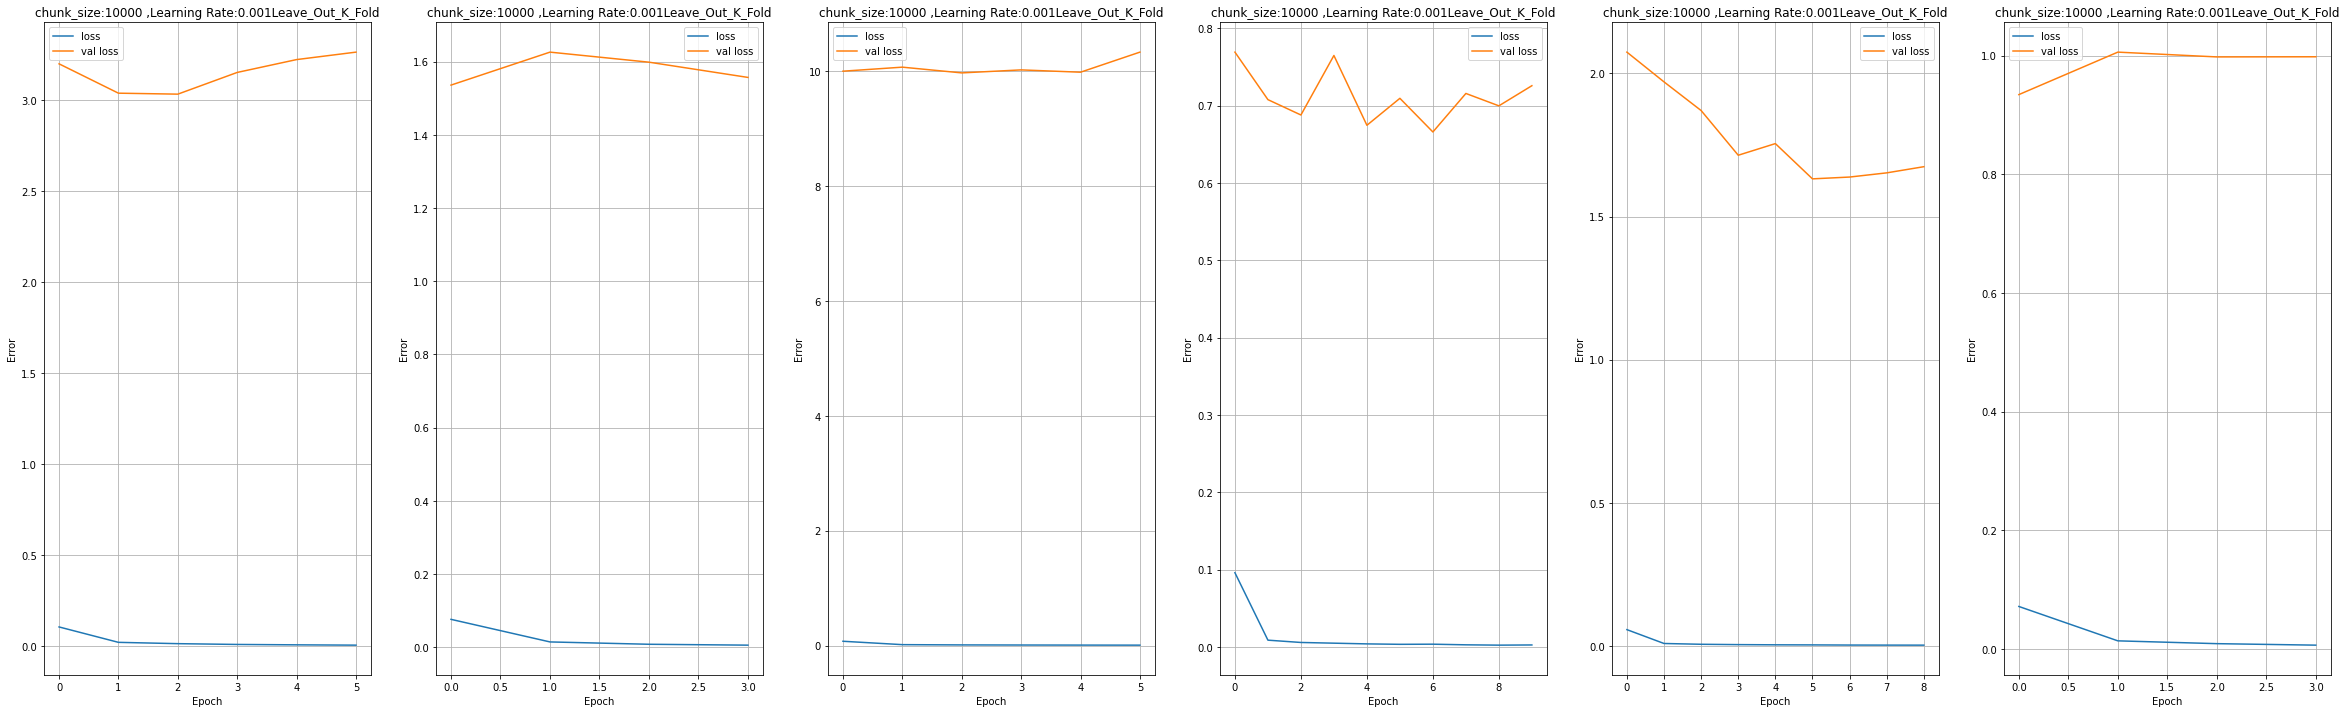

In [199]:
fig = plt.figure(figsize=(48,12), facecolor='w', edgecolor='k')
b=0

for a in range(1,7,1):
    plt.subplot(1,7,a)
    plt.plot(losses['chunk_size:10000']['M_fold'+str(b)], label='loss')
    plt.plot(losses['chunk_size:10000']['M_fold'+str(b)+'_val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('chunk_size:10000'+' ,Learning Rate:0.001'+'Leave_Out_K_Fold')
    plt.legend()
    plt.grid(True)
    b+=1

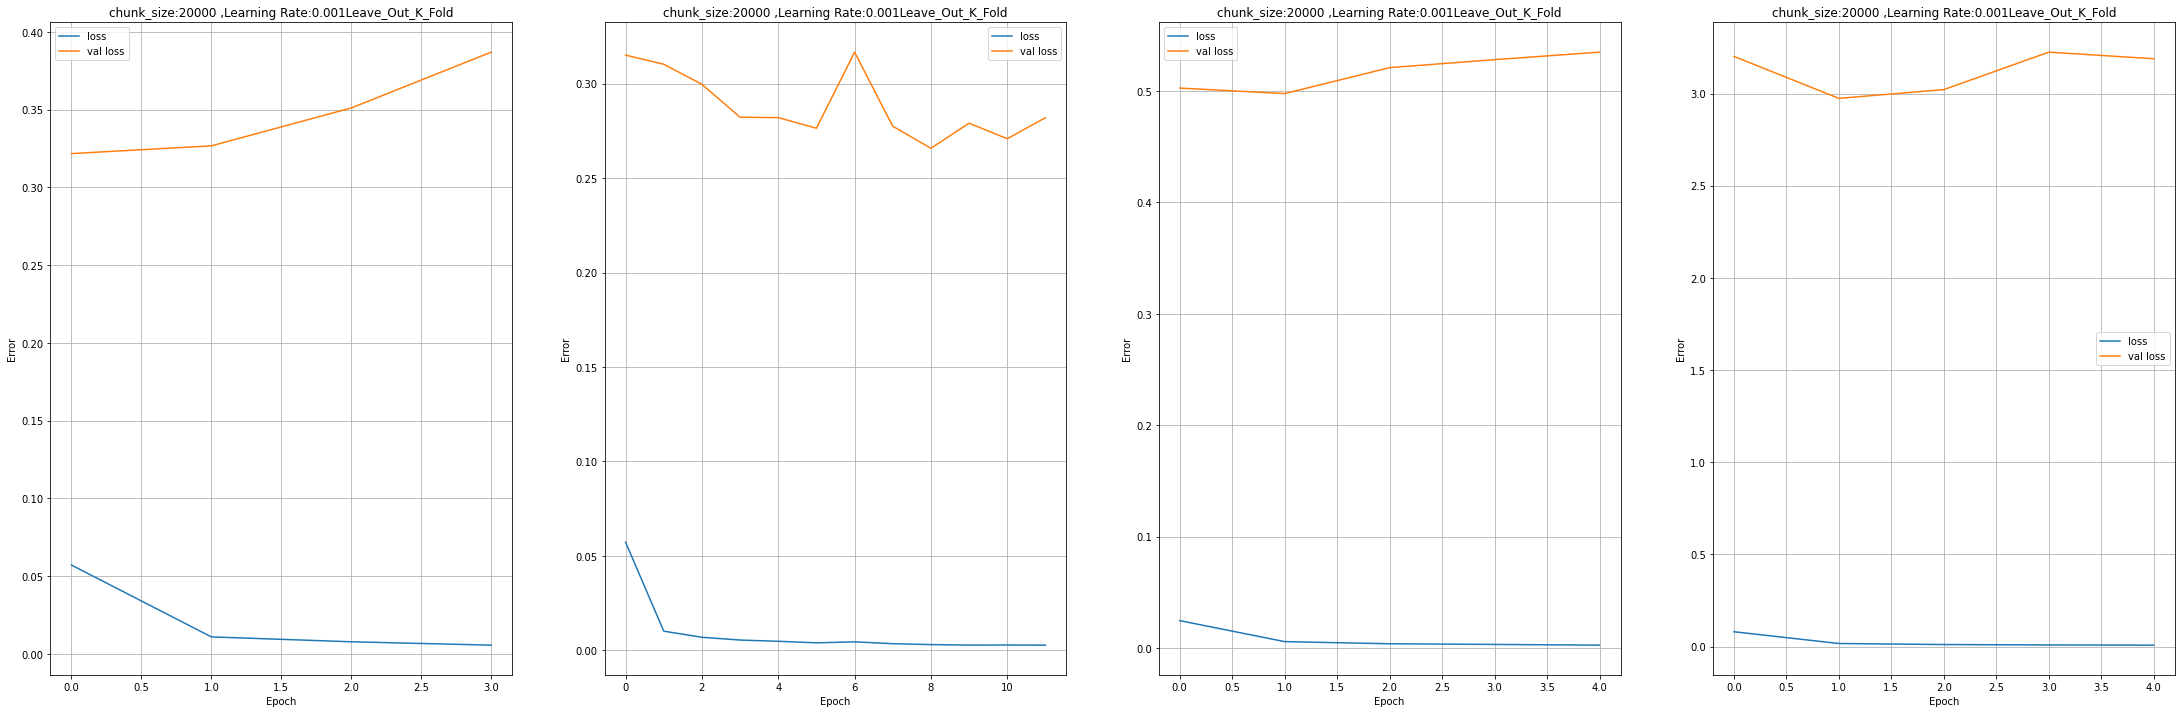

In [201]:
fig = plt.figure(figsize=(48,12), facecolor='w', edgecolor='k')
b=0

for a in range(1,5,1):
    plt.subplot(1,5,a)
    plt.plot(losses['chunk_size:20000']['M_fold'+str(b)], label='loss')
    plt.plot(losses['chunk_size:20000']['M_fold'+str(b)+'_val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('chunk_size:20000'+' ,Learning Rate:0.001'+'Leave_Out_K_Fold')
    plt.legend()
    plt.grid(True)
    b+=1

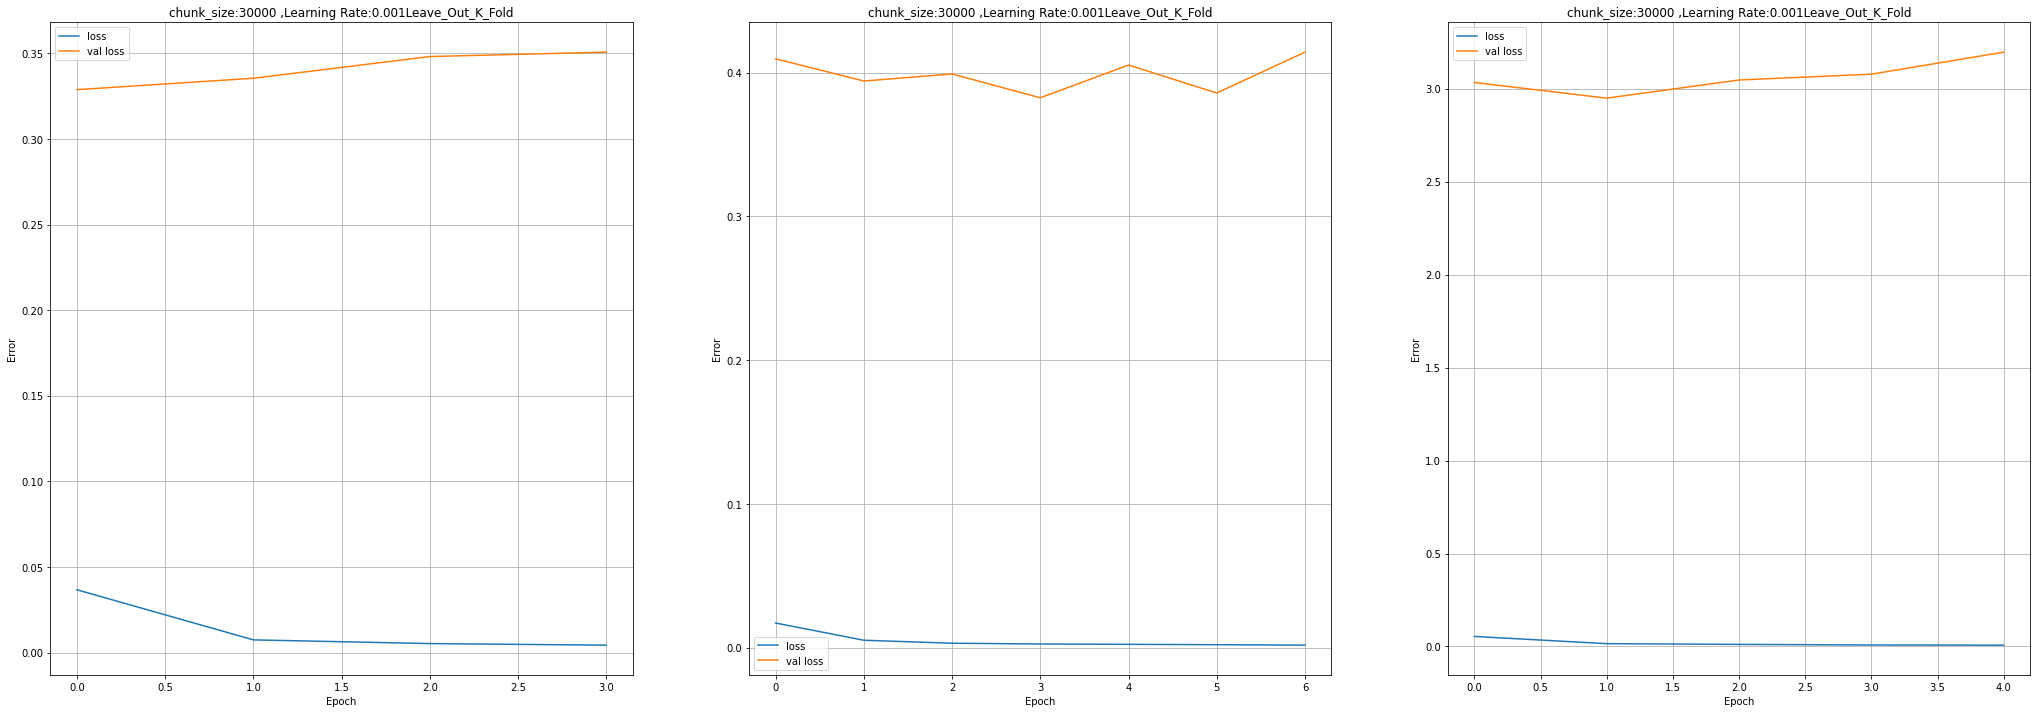

In [204]:
fig = plt.figure(figsize=(48,12), facecolor='w', edgecolor='k')
b=0

for a in range(1,4,1):
    plt.subplot(1,4,a)
    plt.plot(losses['chunk_size:30000']['M_fold'+str(b)], label='loss')
    plt.plot(losses['chunk_size:30000']['M_fold'+str(b)+'_val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('chunk_size:30000'+' ,Learning Rate:0.001'+'Leave_Out_K_Fold')
    plt.legend()
    plt.grid(True)
    b+=1

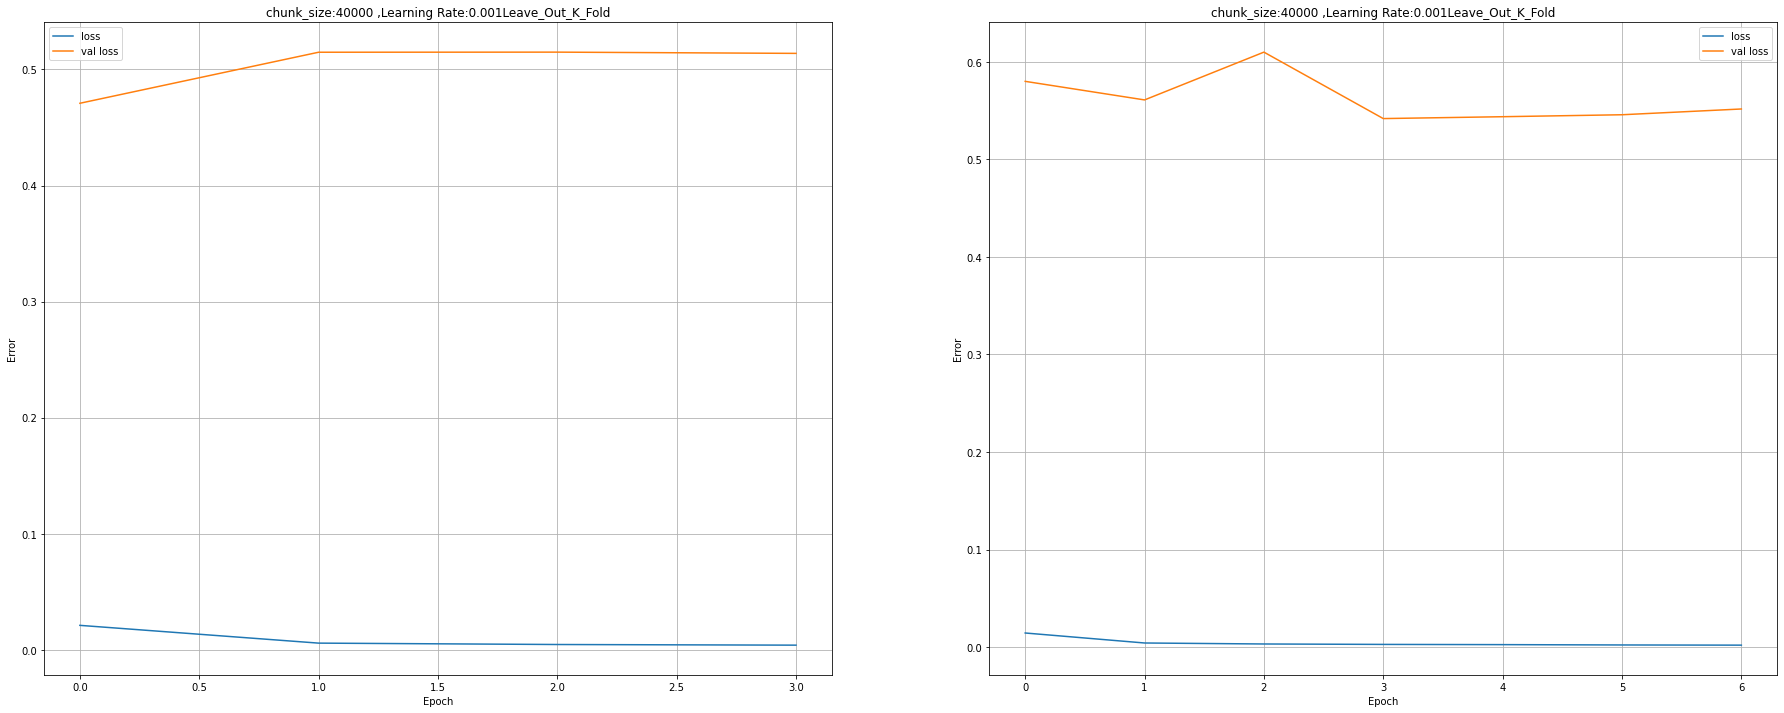

In [206]:
fig = plt.figure(figsize=(48,12), facecolor='w', edgecolor='k')
b=0

for a in range(1,3,1):
    plt.subplot(1,3,a)
    plt.plot(losses['chunk_size:40000']['M_fold'+str(b)], label='loss')
    plt.plot(losses['chunk_size:40000']['M_fold'+str(b)+'_val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('chunk_size:40000'+' ,Learning Rate:0.001'+'Leave_Out_K_Fold')
    plt.legend()
    plt.grid(True)
    b+=1

In [3]:
# Load the model definitions and datasets
linear_model, lstm_model, dnn_model, df_all_chan,input_columns  = d2d.import_data()
# names = ('Multistep_Linear','Multistep_DNN','Multistep_LSTM')
names = ('Multistep_LSTM')
models = [lstm_model]

n = [10000,20000,30000, 40000] # The size of the validation set in each fold.
learning_rate = [0.001]

'''
Run the analysis

'''

losses = {}

for lr in learning_rate:
    
    for chunk in n:



        val_performance, performance, history, history_dict \
            = d2d.k_fold(chunk,names,models,df_all_chan,input_columns,early_stop = 10, window_input_width = 200, learning_rate = lr)
        
        losses['chunk_size:'+str(chunk)] = history_dict


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/20
822/822 [==============================] - 170s 202ms/step - loss: 0.0561 - mean_absolute_error: 0.1467 - val_loss: 0.2378 - val_mean_absolute_error: 0.3599
Epoch 2/20
822/822 [==============================] - 129s 156ms/step - loss: 0.0118 - mean_absolute_error: 0.0776 - val_loss: 0.2295 - val_mean_absolute_error: 0.3624
Epoch 3/20
822/822 [==============================] - 121s 146ms/step - loss: 0.0086 - mean_absolute_error: 0.0663 - val_loss: 0.2764 - val_mean_absolute_error: 0.3864
Epoch 4/20
822/822 [==============================] - 120s 145ms/step - loss: 0.0063 - mean_absolute_error: 0.0571 - val_loss: 0.2392 - val_mean_absolute_error: 0.3771
Epoch 5/20
91/91 [==============================] - 14s 76ms/step - loss: 0.2725 - mean_absolute_error: 0.3918
Done with fold: 0
Epoch 1/20
822/822 [==============================] - 121s 145ms/step - loss: 0.0114 - mean_absolute_error: 0.0711 - val_loss: 0.0416 - val_mea

185/185 [==============================] - 22s 77ms/step - loss: 0.3321 - mean_absolute_error: 0.4401
Done with fold: 2
Epoch 1/20
935/935 [==============================] - 131s 138ms/step - loss: 0.0049 - mean_absolute_error: 0.0457 - val_loss: 0.0327 - val_mean_absolute_error: 0.1365
Epoch 2/20
935/935 [==============================] - 130s 138ms/step - loss: 0.0019 - mean_absolute_error: 0.0315 - val_loss: 0.0246 - val_mean_absolute_error: 0.1216
Epoch 3/20
935/935 [==============================] - 131s 139ms/step - loss: 0.0018 - mean_absolute_error: 0.0308 - val_loss: 0.0202 - val_mean_absolute_error: 0.1104
Epoch 4/20
935/935 [==============================] - 131s 139ms/step - loss: 0.0017 - mean_absolute_error: 0.0297 - val_loss: 0.0248 - val_mean_absolute_error: 0.1229
Epoch 5/20
935/935 [==============================] - 132s 140ms/step - loss: 0.0016 - mean_absolute_error: 0.0291 - val_loss: 0.0255 - val_mean_absolute_error: 0.1230
Epoch 6/20
23/23 [======================

In [8]:
losses['chunk_size:10000']

{'M_fold0_loss': [0.05611399933695793,
  0.011777477338910103,
  0.008599495515227318,
  0.006268142256885767,
  0.006161733530461788],
 'M_fold0_val_loss': [0.23779992759227753,
  0.22954633831977844,
  0.276357501745224,
  0.23916858434677124,
  0.27251437306404114],
 'M_fold1_loss': [0.011390908621251583,
  0.00568165211006999,
  0.004318438470363617,
  0.003968114964663982],
 'M_fold1_val_loss': [0.04164398834109306,
  0.07343791425228119,
  0.0918847918510437,
  0.1150703877210617],
 'M_fold2_loss': [0.008928501978516579,
  0.004949650727212429,
  0.00423267250880599,
  0.00421401159837842],
 'M_fold2_val_loss': [0.1959177404642105,
  0.20525480806827545,
  0.22961018979549408,
  0.24290679395198822],
 'M_fold3_loss': [0.005607223138213158,
  0.004057224839925766,
  0.004160669632256031,
  0.0032350888941437006],
 'M_fold3_val_loss': [0.08178504556417465,
  0.10261333733797073,
  0.12995682656764984,
  0.13464988768100739],
 'M_fold4_loss': [0.004885931499302387,
  0.0039132256060

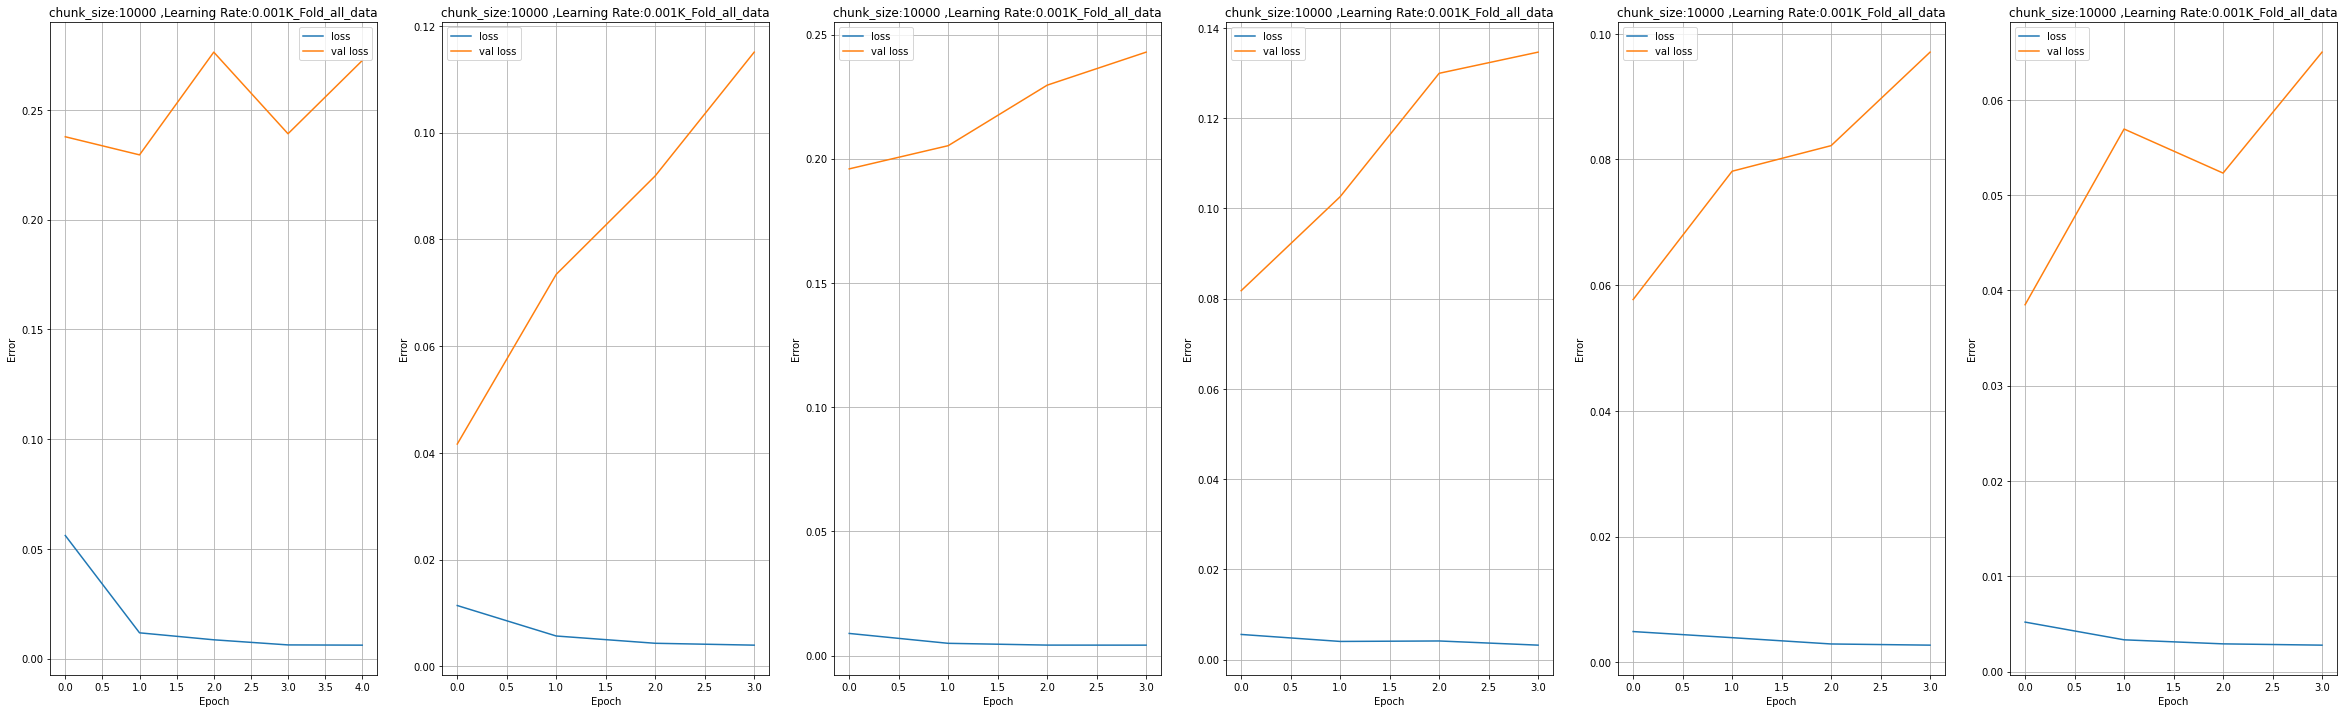

In [10]:
fig = plt.figure(figsize=(48,12), facecolor='w', edgecolor='k')
b=0

for a in range(1,7,1):
    plt.subplot(1,7,a)
    plt.plot(losses['chunk_size:10000']['M_fold'+str(b)+'_loss'], label='loss')
    plt.plot(losses['chunk_size:10000']['M_fold'+str(b)+'_val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('chunk_size:10000'+' ,Learning Rate:0.001'+'K_Fold_all_data')
    plt.legend()
    plt.grid(True)
    b+=1

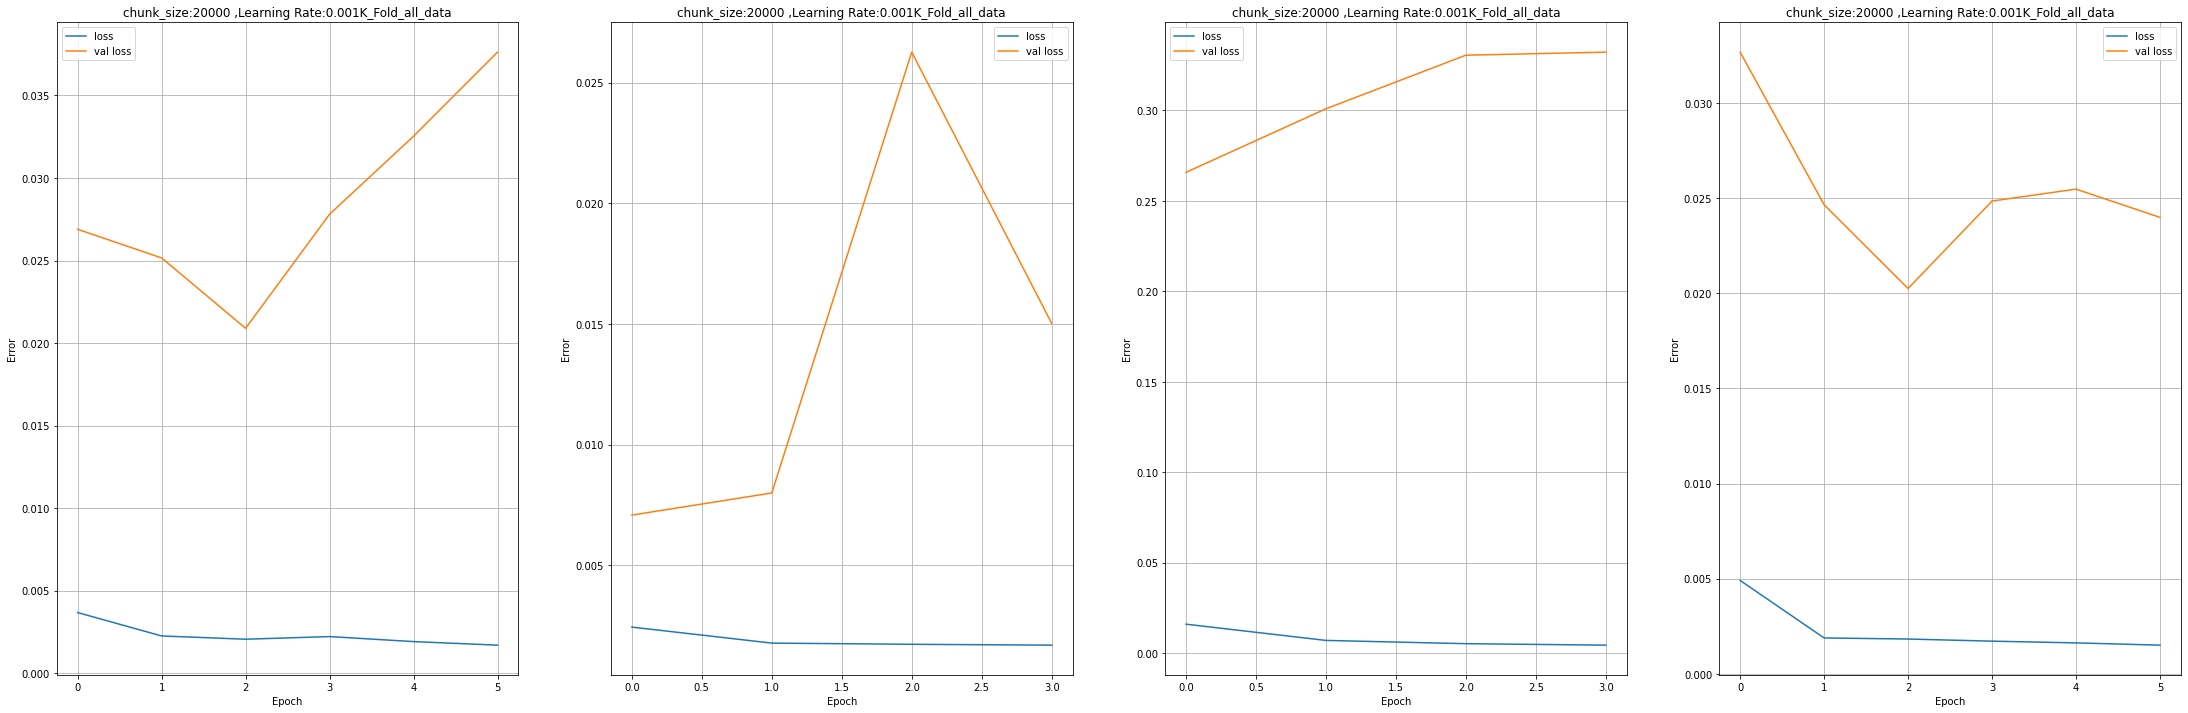

In [13]:
fig = plt.figure(figsize=(48,12), facecolor='w', edgecolor='k')
b=0

for a in range(1,5,1):
    plt.subplot(1,5,a)
    plt.plot(losses['chunk_size:20000']['M_fold'+str(b)+'_loss'], label='loss')
    plt.plot(losses['chunk_size:20000']['M_fold'+str(b)+'_val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('chunk_size:20000'+' ,Learning Rate:0.001'+'K_Fold_all_data')
    plt.legend()
    plt.grid(True)
    b+=1

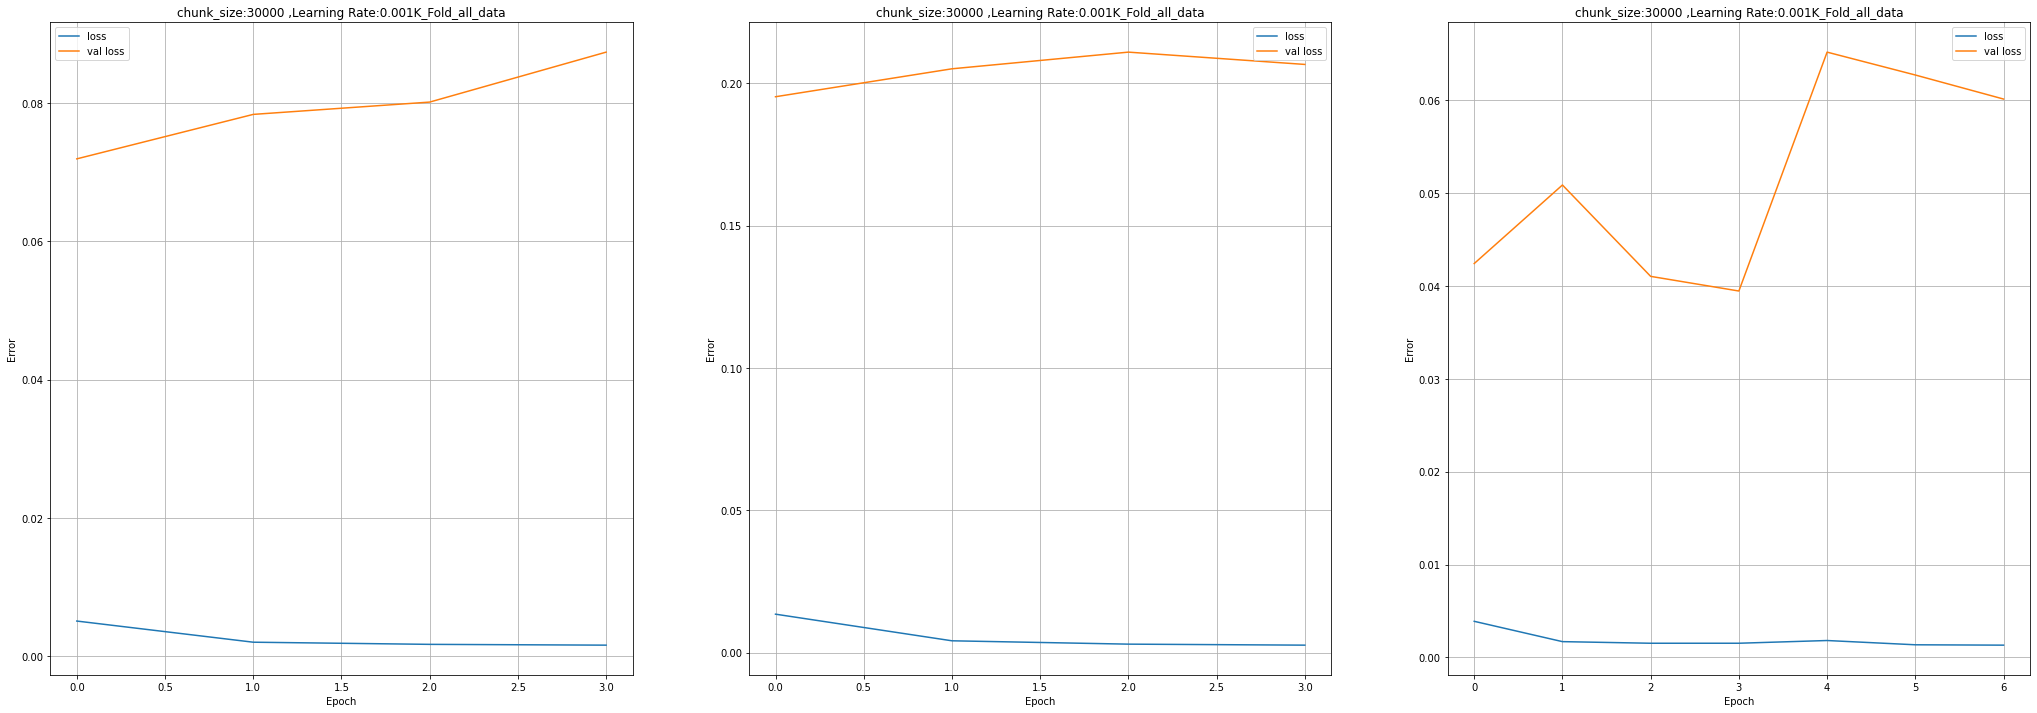

In [14]:
fig = plt.figure(figsize=(48,12), facecolor='w', edgecolor='k')
b=0

for a in range(1,4,1):
    plt.subplot(1,4,a)
    plt.plot(losses['chunk_size:30000']['M_fold'+str(b)+'_loss'], label='loss')
    plt.plot(losses['chunk_size:30000']['M_fold'+str(b)+'_val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('chunk_size:30000'+' ,Learning Rate:0.001'+'K_Fold_all_data')
    plt.legend()
    plt.grid(True)
    b+=1

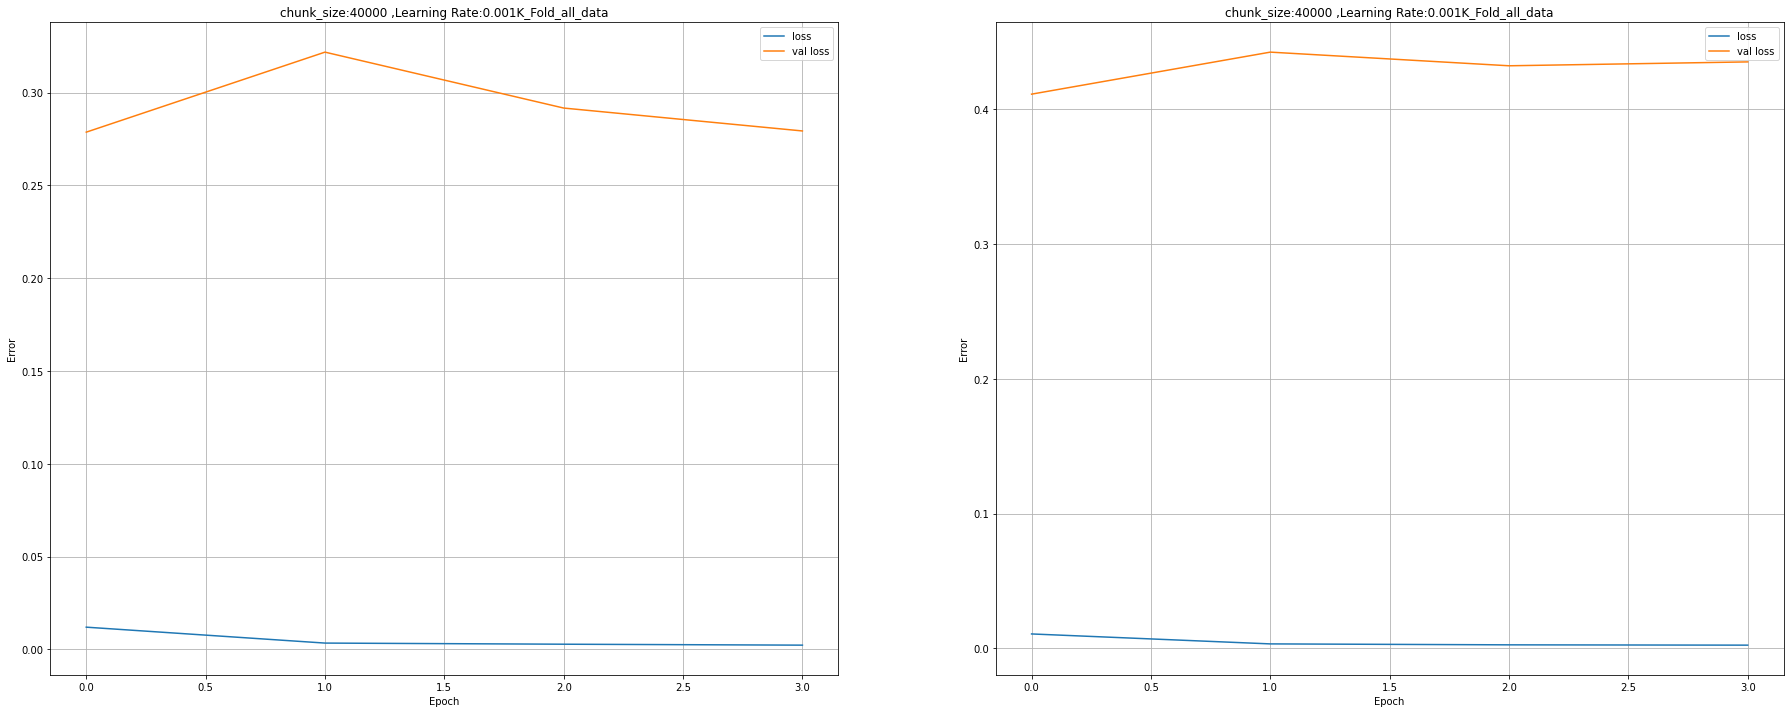

In [15]:
fig = plt.figure(figsize=(48,12), facecolor='w', edgecolor='k')
b=0

for a in range(1,3,1):
    plt.subplot(1,3,a)
    plt.plot(losses['chunk_size:40000']['M_fold'+str(b)+'_loss'], label='loss')
    plt.plot(losses['chunk_size:40000']['M_fold'+str(b)+'_val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('chunk_size:40000'+' ,Learning Rate:0.001'+'K_Fold_all_data')
    plt.legend()
    plt.grid(True)
    b+=1